In [33]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt

In [34]:
os.chdir('/Users/shanelldodson/Downloads/london')

In [35]:
lgangs = pd.read_csv('LONDON_GANG.csv')

In [51]:
nodes = lgangs["Unnamed: 0"].tolist()

In [52]:
edges = []
for index, row in lgangs.iterrows():
    source_node = row["Unnamed: 0"]
    for column, value in row.items():
        if column != "Unnamed: 0" and value != 0:
            target_node = column
            edges.append((source_node, target_node))

In [53]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

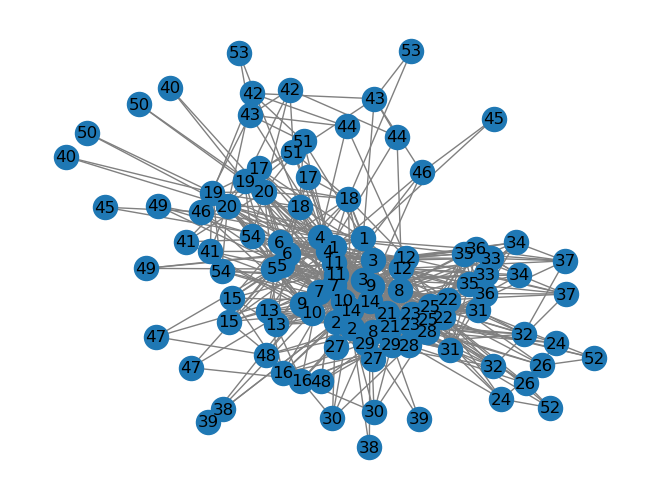

In [39]:
nx.draw(G, edge_color='grey', with_labels=True)

In [ ]:
density = nx.density(G)

print("Network Density:", density)

Network Density: 0.10903426791277258


In [41]:
# finding the node with the least influence
betweenness = nx.betweenness_centrality(G)
most_influence = max(betweenness, key=betweenness.get)

print("Most effective node to remove:", most_influence)
print("Betweenness centrality:", betweenness[most_influence])

Most effective node to remove: 1
Betweenness centrality: 0.06687061963187618


In [47]:
# removing row from data
lgangs.drop(1, inplace=True)

In [49]:
# removing column from data
lgangs.drop(columns=['1'], inplace=True)

Re-run nodes, edges, and G to add new data

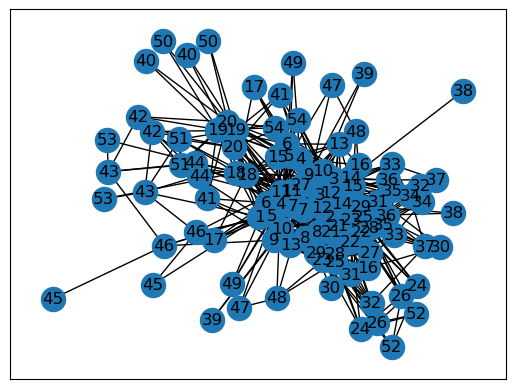

In [54]:
# New graph
nx.draw_networkx(G, with_labels=True)

In [56]:
# New Network Density
density = nx.density(G)

print('New network density:', density)

New network density: 0.10494159928122192


Using betweenness centrality to decided the weakest link changed the density of the network from 10.90% to 10.49%, showing that the link that was removed did not change much of the connections in the overall network.